# MLZC_HOMEWORK_WK6

## SETUP

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, roc_auc_score, accuracy_score, root_mean_squared_error
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from tqdm.auto import tqdm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import export_text

print("✅ Libraries loaded\n")
print(f"Python version: {sys.version.split()[0]}")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version:  {np.__version__}")
print(f"Seaborn version:  {sns.__version__}")
print(f"Matplotlib version:  {matplotlib.__version__}")

✅ Libraries loaded

Python version: 3.12.3
Pandas version: 2.3.2
NumPy version:  2.3.2
Seaborn version:  0.13.2
Matplotlib version:  3.10.6


## DATA

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'
!wget $data -O car_fuel_efficiency.csv

--2025-11-03 17:26:41--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.1s    

2025-11-03 17:26:41 (8.56 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



## EDA

In [3]:
df = pd.read_csv(data)
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [4]:
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")

df.head()

Shape: 9704 rows × 11 columns

Columns: ['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight', 'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain', 'num_doors', 'fuel_efficiency_mpg']

Data types:
engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

Missing values:
engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64


,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [5]:
categorical = ['origin', 'fuel_type', 'drivetrain']
numerical = ['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight', 'acceleration', 'model_year', 'num_doors']
print(df.isnull().sum())

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64


In [6]:
df[numerical] = df[numerical].fillna(0.0)
    
print(df.isnull().sum())

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64


## FRAMEWORK

In [7]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [8]:
df_train

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors
0,120,5.0,169.0,2966.679505,13.9,2005,USA,Gasoline,Front-wheel drive,-1.0
1,200,3.0,143.0,2950.822121,17.1,2013,Asia,Diesel,Front-wheel drive,-1.0
2,180,6.0,180.0,3078.221669,17.4,2007,USA,Gasoline,All-wheel drive,0.0
3,280,5.0,174.0,2797.991793,0.0,2016,USA,Diesel,All-wheel drive,0.0
4,250,4.0,133.0,2362.426930,16.3,2010,USA,Diesel,Front-wheel drive,-1.0
...,...,...,...,...,...,...,...,...,...,...
5817,230,3.0,176.0,3430.993044,17.9,2022,Europe,Diesel,All-wheel drive,0.0
5818,250,4.0,180.0,3067.664350,15.7,2010,Asia,Diesel,All-wheel drive,-1.0
5819,230,2.0,182.0,3041.964593,16.7,2010,Europe,Diesel,All-wheel drive,0.0
5820,180,7.0,147.0,2453.341430,15.2,2015,Europe,Gasoline,All-wheel drive,0.0


## MODEL

In [9]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [10]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [11]:
y_pred = dt.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)
print(f"RMSE: {rmse}")

RMSE: 1.610463902882759


## QUESTIONS

In [12]:
# Q1: Which feature is used for splitting the data?
feature_names = dv.get_feature_names_out()
print("Feature used for splitting:", feature_names[dt.tree_.feature[0]])

Feature used for splitting: vehicle_weight


In [13]:
# Q2: What's the RMSE of this model on the validation data?
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)
print(f"RMSE: {rmse}")

RMSE: 0.4599777557336148


In [48]:
# Q3: After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.
scores = []

for n in range (10, 201, 10):
    print(f"training {n} estimators")
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse_full = root_mean_squared_error(y_val, y_pred)
    rmse_rounded = round(rmse_full, 3)
    scores.append((n, rmse_full)) 
    
for n_est, rmse in scores:
    print(f"{n_est}: {round(rmse, 3)}")

training 10 estimators
training 20 estimators
training 30 estimators
training 40 estimators
training 50 estimators
training 60 estimators
training 70 estimators
training 80 estimators
training 90 estimators
training 100 estimators
training 110 estimators
training 120 estimators
training 130 estimators
training 140 estimators
training 150 estimators
training 160 estimators
training 170 estimators
training 180 estimators
training 190 estimators
training 200 estimators
10: 0.46
20: 0.454
30: 0.451
40: 0.448
50: 0.446
60: 0.445
70: 0.445
80: 0.445
90: 0.445
100: 0.444
110: 0.443
120: 0.444
130: 0.443
140: 0.443
150: 0.443
160: 0.443
170: 0.443
180: 0.442
190: 0.443
200: 0.443


In [14]:
from matplotlib.ticker import FormatStrFormatter

df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

plt.figure(figsize=(10, 6))
plt.plot(df_scores.n_estimators, df_scores.rmse, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('RMSE vs n_estimators')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

plt.show()

NameError: name 'scores' is not defined

In [15]:
# Q4: What's the best max_depth, using the mean RMSE?
scores = []

for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        print(f"training {d} depth & {n} estimators")
        rf = RandomForestRegressor(n_estimators=n, 
                                   max_depth=d, 
                                   random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse_full = root_mean_squared_error(y_val, y_pred)
        scores.append((d, n, rmse_full)) 

# Calculate mean RMSE for each depth
for depth in [10, 15, 20, 25]:
    depth_rmses = [rmse for d, n, rmse in scores if d == depth]
    mean_rmse = sum(depth_rmses) / len(depth_rmses)
    print(f"Depth {depth} mean RMSE: {mean_rmse:.6f}")


training 10 depth & 10 estimators
training 10 depth & 20 estimators
training 10 depth & 30 estimators
training 10 depth & 40 estimators
training 10 depth & 50 estimators
training 10 depth & 60 estimators
training 10 depth & 70 estimators
training 10 depth & 80 estimators
training 10 depth & 90 estimators
training 10 depth & 100 estimators
training 10 depth & 110 estimators
training 10 depth & 120 estimators
training 10 depth & 130 estimators
training 10 depth & 140 estimators
training 10 depth & 150 estimators
training 10 depth & 160 estimators
training 10 depth & 170 estimators
training 10 depth & 180 estimators
training 10 depth & 190 estimators
training 10 depth & 200 estimators
training 15 depth & 10 estimators
training 15 depth & 20 estimators
training 15 depth & 30 estimators
training 15 depth & 40 estimators
training 15 depth & 50 estimators
training 15 depth & 60 estimators
training 15 depth & 70 estimators
training 15 depth & 80 estimators
training 15 depth & 90 estimators
tra

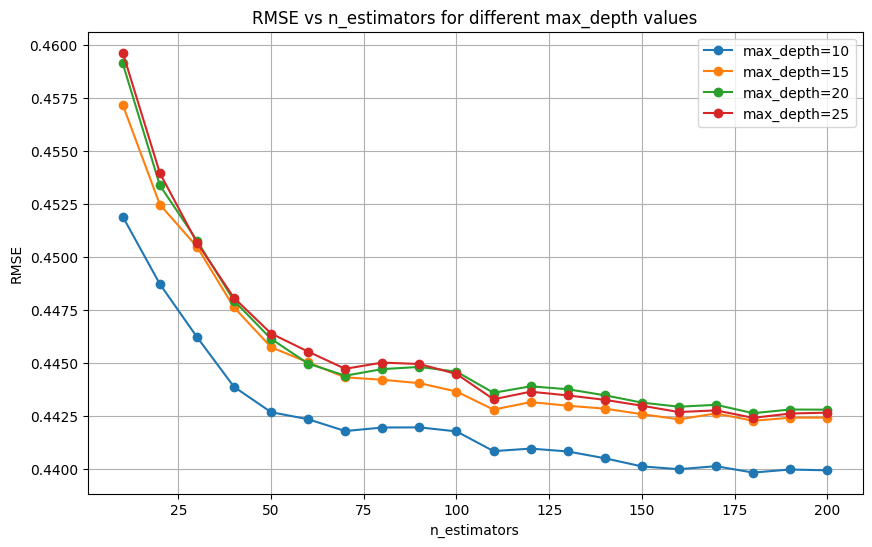

In [17]:
df_scores = pd.DataFrame(scores, columns=['max_depth','n_estimators', 'rmse'])

plt.figure(figsize=(10, 6))

for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.rmse, label='max_depth=%d' % d, marker='o')

plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('RMSE vs n_estimators for different max_depth values')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Q5: What's the most important feature?
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

feature_names = dv.get_feature_names_out()
feature_importance_pairs = list(zip(feature_names, rf.feature_importances_))

feature_importance_pairs.sort(key=lambda x: x[1], reverse=True)

print("Feature importances (sorted):")
for feature, importance in feature_importance_pairs:
    print(f"{feature}: {importance:.6f}")

print(f"\nMost important feature: {feature_importance_pairs[0][0]}")

Feature importances (sorted):
vehicle_weight: 0.959162
horsepower: 0.016040
acceleration: 0.011471
engine_displacement: 0.003269
model_year: 0.003182
num_cylinders: 0.002359
num_doors: 0.001591
origin=USA: 0.000555
origin=Europe: 0.000520
origin=Asia: 0.000476
drivetrain=All-wheel drive: 0.000382
fuel_type=Diesel: 0.000344
fuel_type=Gasoline: 0.000337
drivetrain=Front-wheel drive: 0.000312

Most important feature: vehicle_weight


In [19]:
# Q6: Which eta leads to the best RMSE score on the validation dataset?
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
watchlist = [(dtrain, 'train'), (dval, 'val')]

for eta in [0.3, 0.1]:
    xgb_params = {
        'eta': eta, 
        'max_depth': 6,
        'min_child_weight': 1,
        'objective': 'reg:squarederror',
        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
    }
    
    model = xgb.train(xgb_params, dtrain, evals=watchlist, num_boost_round=100)
    y_pred = model.predict(dval)
    rmse = root_mean_squared_error(y_val, y_pred)
    print(f"eta={eta}: final RMSE = {rmse}")

[0]	train-rmse:1.81393	val-rmse:1.85444
[1]	train-rmse:1.31919	val-rmse:1.35353
[2]	train-rmse:0.98120	val-rmse:1.01316
[3]	train-rmse:0.75443	val-rmse:0.78667
[4]	train-rmse:0.60680	val-rmse:0.64318
[5]	train-rmse:0.51381	val-rmse:0.55664
[6]	train-rmse:0.45470	val-rmse:0.50321
[7]	train-rmse:0.41881	val-rmse:0.47254
[8]	train-rmse:0.39534	val-rmse:0.45509
[9]	train-rmse:0.38038	val-rmse:0.44564
[10]	train-rmse:0.37115	val-rmse:0.43896
[11]	train-rmse:0.36361	val-rmse:0.43594
[12]	train-rmse:0.35850	val-rmse:0.43558
[13]	train-rmse:0.35365	val-rmse:0.43394
[14]	train-rmse:0.35025	val-rmse:0.43349
[15]	train-rmse:0.34666	val-rmse:0.43362
[16]	train-rmse:0.34459	val-rmse:0.43378
[17]	train-rmse:0.34128	val-rmse:0.43405
[18]	train-rmse:0.33822	val-rmse:0.43391
[19]	train-rmse:0.33709	val-rmse:0.43374
[20]	train-rmse:0.33553	val-rmse:0.43376
[21]	train-rmse:0.33243	val-rmse:0.43453
[22]	train-rmse:0.33031	val-rmse:0.43510
[23]	train-rmse:0.32815	val-rmse:0.43601
[24]	train-rmse:0.32670	va